In [1]:
import sqlite3

In [2]:
connection = sqlite3.connect('student_grades.db')

In [3]:
cursor = connection.cursor()

In [4]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

In [5]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students (student_id)
)
''')

In [6]:
students_data = [
    (1, "Alice", "Johnson"),
    (2, "Bob", "Smith"),
    (3, "Carol", "White"),
    (4, "David", "Brown"),
    (5, "Eve", "Davis"),
]

cursor.executemany('''
INSERT OR IGNORE INTO students (student_id, first_name, last_name)
VALUES (?, ?, ?)
''', students_data)

In [7]:
grades_data = [
    (1, 1, 'Math', 95),
    (2, 1, 'English', 88),
    (3, 1, 'History', 90),
    (4, 2, 'Math', 82),
    (5, 2, 'English', 76),
    (6, 2, 'History', 85),
    (7, 3, 'Math', 91),
    (8, 3, 'English', 83),
    (9, 3, 'History', 87),
    (10, 4, 'Math', 79),
    (11, 4, 'English', 85),
    (12, 4, 'History', 88),
    (13, 5, 'Math', 93),
    (14, 5, 'English', 89),
    (15, 5, 'History', 92)
]

cursor.executemany('''
INSERT OR IGNORE INTO grades (grade_id, student_id, subject, grade)
VALUES (?, ?, ?, ?)
''', grades_data)

In [8]:
query1 = """
SELECT s.first_name, s.last_name, g.subject, g.grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
ORDER BY s.last_name, s.first_name, g.subject;
"""

query2 = """
SELECT s.first_name, s.last_name, AVG(g.grade) as avg_grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
GROUP BY s.student_id
ORDER BY avg_grade DESC;
"""

query3 = """
SELECT s.first_name, s.last_name, AVG(g.grade) as avg_grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
GROUP BY s.student_id
ORDER BY avg_grade DESC
LIMIT 1;
"""

query4 = """
SELECT subject, AVG(grade) as avg_grade
FROM grades
WHERE subject= 'Math';
"""

query5 = """
SELECT DISTINCT s.first_name, s.last_name, g.subject, g.grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
WHERE g.grade > 90
ORDER BY s.last_name, s.first_name, g.subject;
"""

In [9]:
for i, query in enumerate([query1, query2, query3, query4, query5], 1):
    print(f"\n Query {i} results:")
    cursor.execute(query)
    results = cursor.fetchall()
    for row in results:
        print(row)


 Query 1 results:
('David', 'Brown', 'English', 85)
('David', 'Brown', 'History', 88)
('David', 'Brown', 'Math', 79)
('Eve', 'Davis', 'English', 89)
('Eve', 'Davis', 'History', 92)
('Eve', 'Davis', 'Math', 93)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Alice', 'Johnson', 'Math', 95)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Bob', 'Smith', 'Math', 82)
('Carol', 'White', 'English', 83)
('Carol', 'White', 'History', 87)
('Carol', 'White', 'Math', 91)

 Query 2 results:
('Eve', 'Davis', 91.33333333333333)
('Alice', 'Johnson', 91.0)
('Carol', 'White', 87.0)
('David', 'Brown', 84.0)
('Bob', 'Smith', 81.0)

 Query 3 results:
('Eve', 'Davis', 91.33333333333333)

 Query 4 results:
('Math', 88.0)

 Query 5 results:
('Eve', 'Davis', 'History', 92)
('Eve', 'Davis', 'Math', 93)
('Alice', 'Johnson', 'Math', 95)
('Carol', 'White', 'Math', 91)


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
students_df = pd.read_sql_query("SELECT * FROM students", connection)
grades_df = pd.read_sql_query("SELECT * FROM grades", connection)

print("Students dataframe:\n", students_df)
print("\nGrades dataframe:\n", grades_df)

Students dataframe:
    student_id first_name last_name
0           1      Alice   Johnson
1           2        Bob     Smith
2           3      Carol     White
3           4      David     Brown
4           5        Eve     Davis

Grades dataframe:
     grade_id  student_id  subject  grade
0          1           1     Math     95
1          2           1  English     88
2          3           1  History     90
3          4           2     Math     82
4          5           2  English     76
5          6           2  History     85
6          7           3     Math     91
7          8           3  English     83
8          9           3  History     87
9         10           4     Math     79
10        11           4  English     85
11        12           4  History     88
12        13           5     Math     93
13        14           5  English     89
14        15           5  History     92


In [12]:
combined_df = pd.read_sql_query("""
    SELECT s.student_id, s.first_name, s.last_name, g.subject, g.grade
    FROM students s
    JOIN grades g ON s.student_id = g.student_id
""", connection)

print("Combined dataframe:\n", combined_df)

Combined dataframe:
     student_id first_name last_name  subject  grade
0            1      Alice   Johnson     Math     95
1            1      Alice   Johnson  English     88
2            1      Alice   Johnson  History     90
3            2        Bob     Smith     Math     82
4            2        Bob     Smith  English     76
5            2        Bob     Smith  History     85
6            3      Carol     White     Math     91
7            3      Carol     White  English     83
8            3      Carol     White  History     87
9            4      David     Brown     Math     79
10           4      David     Brown  English     85
11           4      David     Brown  History     88
12           5        Eve     Davis     Math     93
13           5        Eve     Davis  English     89
14           5        Eve     Davis  History     92


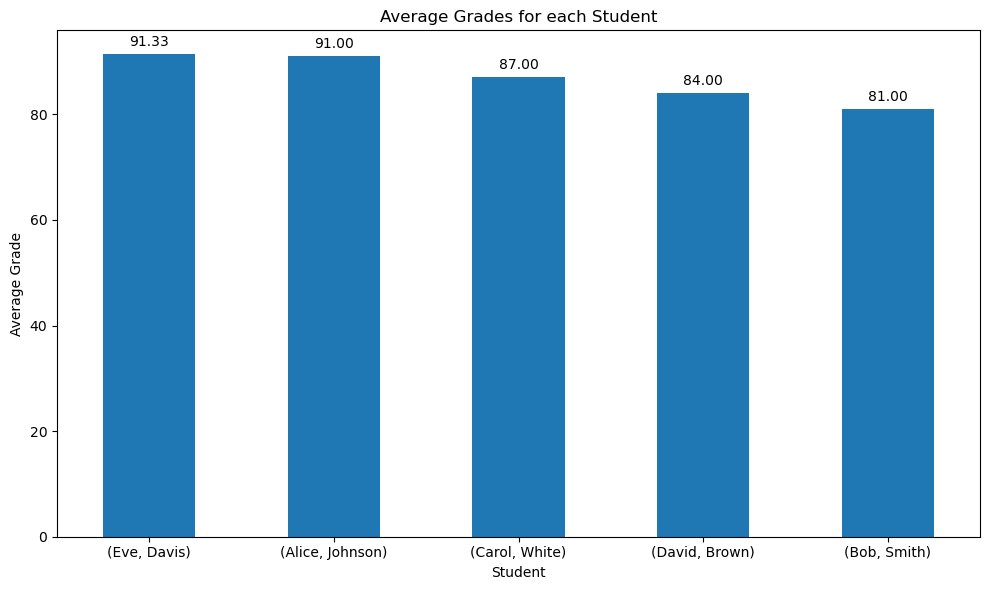

In [13]:
plt.figure(figsize=(10, 6))
avg_grades = combined_df.groupby(['first_name', 'last_name'])['grade'].mean().sort_values(ascending=False)
avgs = avg_grades.plot(kind='bar')
plt.title('Average Grades for each Student')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.xticks(rotation=0)
plt.tight_layout()

# for loop for showing exact values obtained from GPT 4o
for p in avgs.patches:
    avgs.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

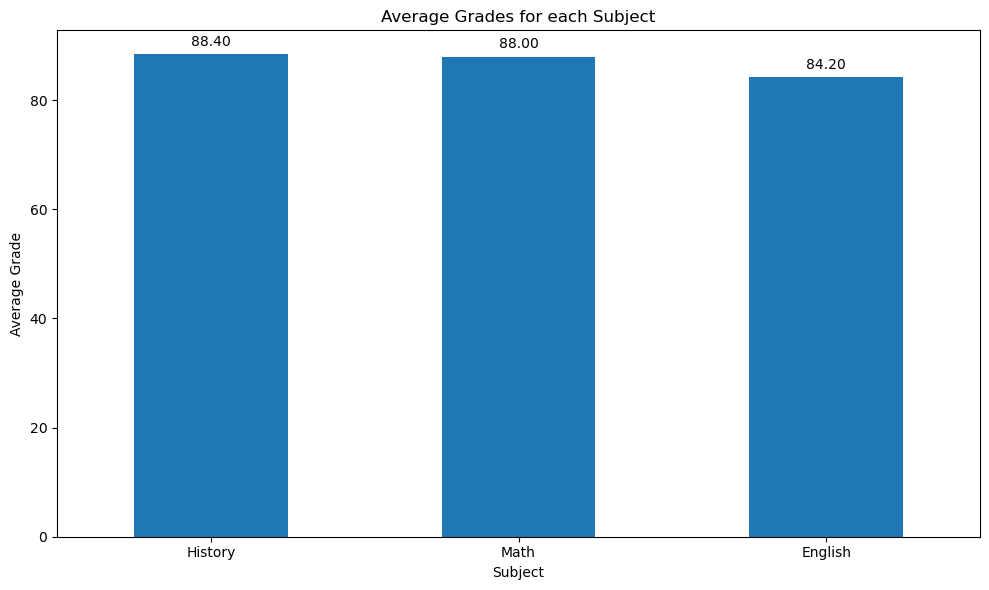

In [14]:
plt.figure(figsize=(10, 6))
subject_averages = combined_df.groupby(['subject'])['grade'].mean().sort_values(ascending=False)
avgs = subject_averages.plot(kind='bar')
plt.title('Average Grades for each Subject')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.xticks(rotation=0)
plt.tight_layout()

# for loop for showing exact values obtained from GPT 4o
for p in avgs.patches:
    avgs.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

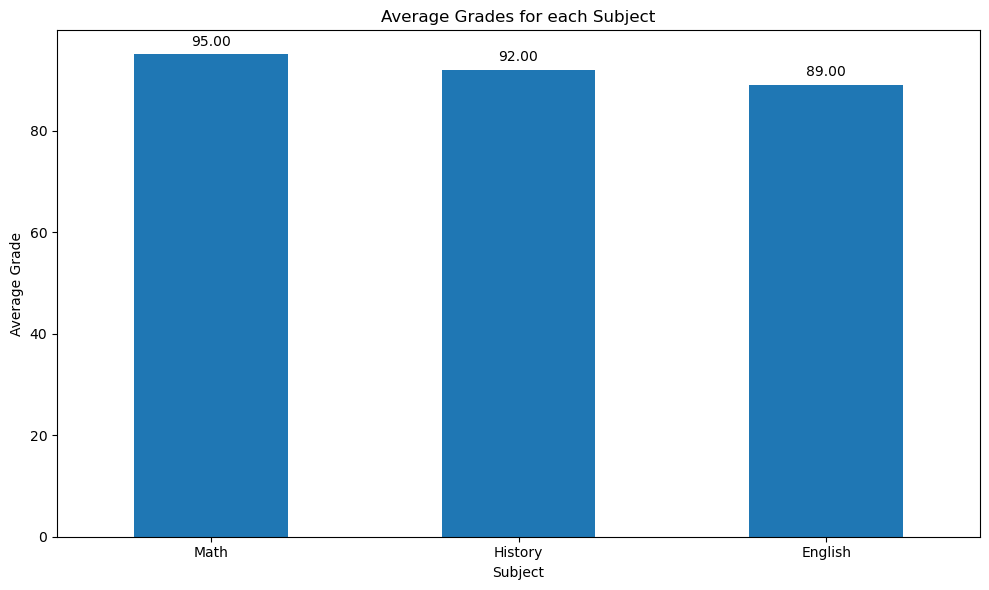

In [19]:
# BONUS TASK

bonus_query = """
SELECT s.first_name, s.last_name, g.subject, MAX(g.grade) as max_grade
FROM students S
JOIN grades g ON s.student_id = g.student_id
GROUP BY g.subject
ORDER BY g.subject;
"""
bonus_df = pd.read_sql_query(bonus_query, connection)

plt.figure(figsize=(10, 6))
subject_maxes = bonus_df.groupby(['subject', 'first_])['max_grade'].mean().sort_values(ascending=False)
maxes = subject_maxes.plot(kind='bar')
plt.title('Highest Grades in each Subject')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.xticks(rotation=0)
plt.tight_layout()

# for loop for showing exact values obtained from GPT 4o
for p in maxes.patches:
    maxes.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')